# Scikit-learn - The number one python ML library!

- Incredibly robust tool
- Consistent code style
- Widely supported by third-party tools


In [1]:
#to install
!pip install scikit-learn

<br>

**The Scikit-learn library provides a very large variety of pre-built algorithms to perform both supervised and unsupervised machine learning. The estimator you choose for your project will depend on the data set you have and the problem that you are trying to solve.**


To help you find out which type of algorithm you need for your problem, you have the help of the Algorithm cheat-sheet provided by scikit-learn documentation.

<img src="https://miro.medium.com/max/875/1*k67P_Lh18fp2WCIJph1HHw.png" alt="Scikit-learn documentation" title="Algorithm cheat-sheet" />

In [2]:
import warnings; warnings.simplefilter('ignore')

<br>

### **1. Supervised learning**
<br>

Supervised learning includes:
- **Classification**, where samples belong to two or more classes, and we want to learn from already labeled data on how to predict the class of unlabeled data. 
- **Regression**, where the desired output consists of one or more continuous variables. 


So let's start with a **multi-classification** problem. We will use a well-known scikit-learn dataset, the Wine dataset. 
<br>

This dataset is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.
<br>

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X =  data.data
y = data.target

print('Features Names: ', data.feature_names)
print('Categories: ', data.target_names)

Features Names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Categories:  ['class_0' 'class_1' 'class_2']


<br>

As our first try, we should go for the simplest approach, a regression based algorithm. As we already know, scikit-learn has an implementation of this algorithm so we just have to import it and save it to a variable so it can be used after. 

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

<br>

Now we have to **fit** our model to our data. Bear in mind that a regression based algorithm is something like **y = a + b*x**. 
<img src="https://miro.medium.com/max/750/1*g8ZIY6-GEsYY3XqBqICvHw.png" title="Regression">

In one hand, when we are trying to predict a number (regression problem) the y is going to be our predicted value, while in the other hand, when we are trying to predict a class (classification problem) the y is going to be the probability of a certain observation belongs to each class. This means that the algorithm needs to learn the weights (**a** and **b**) that best describe our problem. For every algorithm, scikit-learn has an implementation of a **fit()** method.
<br>

But before fitting our model, it is also important to have a way to eval it's performance. To ensure that, we are going to divide our data into two subsets, a train and a test, which will be used for model training (fitting) and evaluation respectively. And obviously there is a method already implemented in scikit-learn for that!


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = lr.fit(X_train, y_train)

<br>

After training the model, we need to predict and eval our model. 
<br>

In terms of prediction, scikit-learn has two important methods. The first is **predict_proba()** which returns an array with the probabilities of an observation belongs to each one of the three classes. The second **predict()** which returns the class most likely for each observation. 

In [6]:
predictions = model.predict(X_test)
print('First five predictions: ', predictions[:5])

First five predictions:  [0 2 1 0 1]


There are several metric implementation on scikit-learn, you can consult it on [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html). As example we are going to calculate accuracy.

In [7]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predictions)

print('Logistic Regression Accuracy: ', acc)

Logistic Regression Accuracy:  0.9333333333333333


<br>

Now, let's try another algorithm, **Random Forest Classifier** for example, and see if it works best. 

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print('Random Forest Classifier Accuracy: ', rf_acc)

Random Forest Classifier Accuracy:  0.9777777777777777


<br>

### **2. Unsupervised learning** 
<br>

So, what does scikit learn offers us in unsupervised algorithms? It offers a wide range of different algorithms that you can check [here](https://scikit-learn.org/stable/modules/clustering.html#clustering).

Today, we are going to look at one of the most common unsupervised learning problems, which is **Clustering**, where the goal is to discover groups of similar examples within the data.<br>
<img src="https://miro.medium.com/max/875/1*gBo_z-hWaT0qQMSea9X6Lg.png">


As mentioned before, one of the biggest advantages of scikit-learn is consistency in the code. This means that independently of the problem type, the usability of methods and functions, is the same.<br>

As dataset, we are going to create a random array of sets of two coordinates.

In [9]:
import numpy as np    

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

<br>Then we select our algorithm. In this example we are going to use **KMeans** which is one of the most famous ones. The main idea is to define k centroids, one for each cluster. These centroids should be placed very carefully because of different location it causes different result. So, the better choice is to place them as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed. At this point we need to re-calculate k new centroids and so on which will finally lead to the final clusters.

<img src="https://miro.medium.com/max/875/1*nkZ6MyngGnXD6DihAfXfPA.jpeg">

In [10]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans = kmeans.fit(X)

print('Observations being labeled: ', X.tolist())
print('After fitting labels: ', kmeans.labels_)    
print('Clusters Centers: ', kmeans.cluster_centers_.tolist() )

Observations being labeled:  [[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]]
After fitting labels:  [1 0 1 0 0 1]
Clusters Centers:  [[3.0, 3.333333333333333], [2.0, 0.6666666666666667]]


In [11]:
km_predictions = kmeans.predict([[1, 1], [4, 0]])

print('New points Clusters: ',km_predictions)

New points Clusters:  [1 1]


<br>

### **3. Data Problems and Preprocessing**

In most real-world machine learning projects the data that you use, will not necessarily be ready to train a model. It is highly likely that you will first need to perform some data preprocessing and transformation steps such as handling missing values, transforming categorical data into numeric or applying feature scaling.
Scikit-learn has built-in methods to perform these preprocessing steps. For example, the **SimpleImputer()** fills in missing values using a method of your choice.

To learn more look in [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html).

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

X_train_clean = imputer.transform(X_train)
X_test_clean = imputer.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_clean, y_train)
rf_predictions = rf_model.predict(X_test_clean)
rf_acc = accuracy_score(y_test, rf_predictions)

print('Random Forest Classifier Accuracy: ', rf_acc)

Random Forest Classifier Accuracy:  1.0


<br> 


### **4. Feature Importance**

Feature importance measures the direction and level of impact of each feature in the output of our model. This analysis is very important in terms of model results **interpretability**, for example, in cases where there is bias in data, either training or testing. 

An highlight to the fact that some model biases are socially or legally unacceptable. For example, if your model works well in the real world because it implicitly profiles people based on ethnicity. If you want to learn more into this type of bias look into [fairness](https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb). However, we are more interested in the good king of bias that helps our models to achieve good outcomes. 

<BarContainer object of 13 artists>

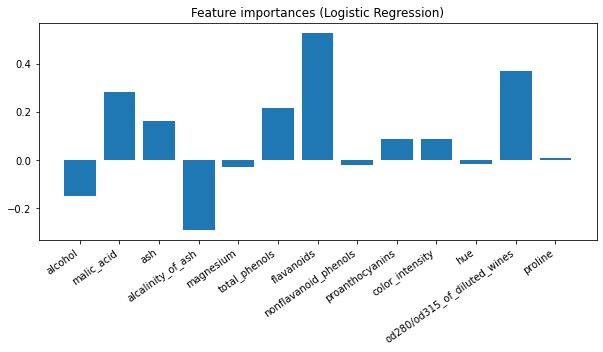

In [14]:
from matplotlib import pyplot

# Logistic regression feature importance is analysed in terms of each classification category, 
# so by selecting the first elemnt of the array we are analysing the feature importance in the first classification category.
lr_feat_imp = lr.coef_[0] 

pyplot.figure(figsize=(10,4))
pyplot.title("Feature importances (Logistic Regression)")
pyplot.xticks(rotation=35, ha="right")
pyplot.bar(data.feature_names, lr_feat_imp)

<BarContainer object of 13 artists>

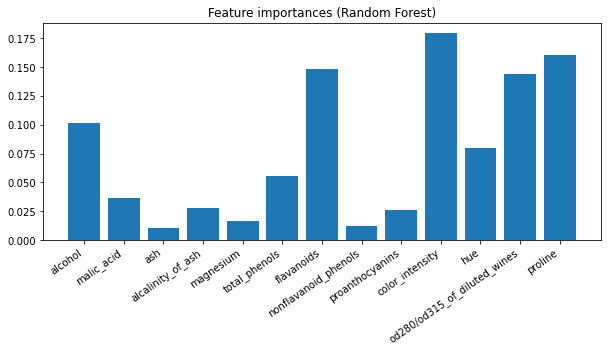

In [15]:
# Random Forest Feature Importance

rf_feat_imp = rf.feature_importances_

pyplot.figure(figsize=(10,4))
pyplot.title("Feature importances (Random Forest)")
pyplot.xticks(rotation=35, ha="right")
pyplot.bar(data.feature_names, rf_feat_imp)


<br>

### **5. Model Selection**

All estimators in the Scikit-learn library contain a range of parameters, for which there are multiple options. The values that you choose for a particular algorithm will impact how well the final model performs. For example, with the RandomForestClassifier you can set the max_depth of the tree to potentially any value, and depending on your data and task, different values for this parameter will produce different results.
This process of trying different combinations of parameters to find the optimal combination is known as **hyperparameter optimization**.
Scikit-learn provides two tools to automatically perform this task, **GridSearchCV** which implements a technique known as exhaustive grid search and **RandomizedSearchCV** which performs randomized parameter optimization.

To look into the available parameters you can call the **get_params()** method.

In [16]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5],
    'criterion' :['gini', 'entropy']
    }

rf = RandomForestClassifier()
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
0.9777777777777779


### **6. Pipelines**

The Scikit-learn package provides a further convenient form of code encapsulation in the form of **pipelines**. This tool enables all preprocessing tasks to be chained together with the classifier step so that simply calling **fit()** or **predict()** on a single pipeline object performs all the steps in your workflow.
This makes for highly readable code and reduces repetition of steps in your machine learning workflow.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([('Imput', SimpleImputer(strategy='median')),
                        ('Scale', StandardScaler()),       
                        ('Model', LogisticRegression())
                    ])

In [20]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

pip_acc = accuracy_score(y_test, y_pred)

print('Pipeline Accuracy: ', pip_acc)

Pipeline Accuracy:  1.0


<BarContainer object of 13 artists>

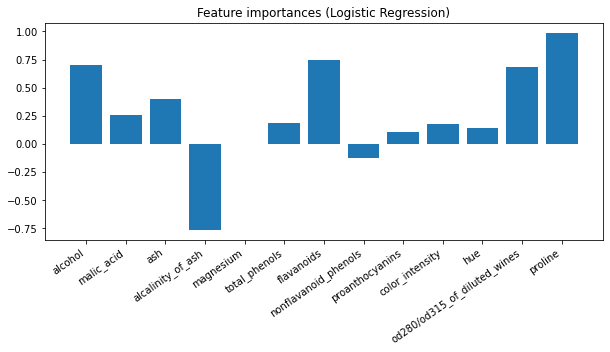

In [21]:
# Feature Importenace from our Pipeline 
lr_feat_imp = pipeline.named_steps['Model'].coef_[0]

pyplot.figure(figsize=(10,4))
pyplot.title("Feature importances (Logistic Regression)")
pyplot.xticks(rotation=35, ha="right")
pyplot.bar(data.feature_names, lr_feat_imp)

We can also do grid search using our pipeline.

In [22]:
param_grid = {'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5],
    'criterion' :['gini', 'entropy']
    }

rf = RandomForestClassifier()

pipeline_grid = Pipeline([('Imput', SimpleImputer(strategy='median')),
                        ('Scale', StandardScaler()),       
                        ('GridSearch', GridSearchCV(rf, param_grid, n_jobs= 1))
                    ])
                 
pipeline_grid.fit(X_train, y_train)  

CV = pipeline_grid.named_steps['GridSearch']

print('Best Parameters: ', CV.best_params_)  
print('Best Estimator: ', CV.best_estimator_)
print('Best Score: ',CV.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best Estimator:  RandomForestClassifier(max_depth=4)
Best Score:  0.9774928774928775


<br>

### **7. Save and Load**

When in production, we are not going to train our model every time we want to make a prediction. That said, there is a way of saving our trained model and then loaded it when needed.

In [23]:
import joblib

print('Saving the pipeline ...')
joblib.dump(pipeline, 'pipeline.pickle')

Saving the pipeline ...


['pipeline.pickle']

In [24]:
print('Loading the pipeline ...')
model = joblib.load('pipeline.pickle')
print(model)

Loading the pipeline ...
Pipeline(steps=[('Imput', SimpleImputer(strategy='median')),
                ('Scale', StandardScaler()), ('Model', LogisticRegression())])


<br>

### **8. Further Reading**

- [Model Selection and Evaluation](https://scikit-learn.org/stable/model_selection.html#model-selection)  
    - specially [Cross Val Score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) <br>
- [Dimensionality Reduction](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)

<br>

Outside Scikit-Learn but very usefull for Exploratory Data Analysis. 
- [Bamboolib](https://bamboolib.8080labs.com/) <br>

